In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import footballdata as foo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("darkgrid")

# 2016-17 Forecasts

In [2]:
five38 = foo.FiveThirtyEight()
print(five38.__doc__)

 Provides pandas.DataFrames from the fivethirtyeight.com project
    "2016-17 Club Soccer Predictions"

    Data will be downloaded as necessary and cached locally in ./data

    Original project and background info:
    https://projects.fivethirtyeight.com/soccer-predictions/
    https://fivethirtyeight.com/features/how-our-club-soccer-projections-work/

    Source JSON:
    https://projects.fivethirtyeight.com/soccer-predictions/data.json

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    


In [3]:
leagues = five38.read_leagues()
leagues

,champions,league_id,longName,relegated,teams
league,,,,,
Champions League,0,1818,Champions League,0,32
ENG-Premier League,4,2411,Premier League,3,20
ESP-La Liga,4,1869,La Liga,3,20
FRA-Ligue 1,3,1843,Ligue 1,2,20
GER-Bundesliga,4,1845,Bundesliga,2,18
ITA-Serie A,3,1854,Serie A,3,20
MEX-Liga MX,4,1975,Liga MX,1,18
USA-MLS,3,1951,MLS,0,22
USA-NWSL,0,4582,NWSL,0,10


In [4]:
games = five38.read_games()
games.sample(5)

,,,adj_score_home,adj_score_away,aggregate_winner,chances_home,chances_away,date,leg,moves_home,moves_away,prob_home,...,shootout_winner,status,home_team,home_code,home_id,home_sdr_id,away_team,away_code,away_id,away_sdr_id
league,season,game_id,,,,,,,,,,,,,,,,,,,,,
USA-NWSL,1617,2017-09-30 Boston Breakers-Sky Blue FC,NaN,NaN,NaN,NaN,NaN,2017-09-30 23:00:00,NaN,NaN,NaN,0.3085,...,NaN,pre,Boston Breakers,BOS,15359,106774,Sky Blue FC,SKY,15364,106779
ENG-Premier League,1617,2017-05-16 Manchester City-West Bromwich Albion,3.15,1.05,NaN,2.416,0.576,2017-05-16 19:00:00,NaN,2.647,0.420,0.7865,...,NaN,post,Manchester City,MNC,382,73608,West Bromwich Albion,WBA,383,73633
GER-Bundesliga,1617,2016-09-25 TSG Hoffenheim-Schalke 04,2.10,1.05,NaN,1.700,1.236,2016-09-25 13:30:00,NaN,0.568,1.372,0.4344,...,NaN,post,TSG Hoffenheim,HOF,7911,84341,Schalke 04,SCH,133,74039
FRA-Ligue 1,1617,2016-10-23 Paris Saint-Germain-Marseille,0.00,0.00,NaN,1.846,0.000,2016-10-23 18:45:00,NaN,2.431,0.157,0.7961,...,NaN,post,Paris Saint-Germain,PSG,160,74427,Marseille,MRS,176,74431
GER-Bundesliga,1617,2017-04-15 Mainz-Hertha Berlin,1.05,0.00,NaN,1.018,0.352,2017-04-15 13:30:00,NaN,2.737,0.921,0.3984,...,NaN,post,Mainz,MNZ,2950,74062,Hertha Berlin,HER,129,74051


In [5]:
forecasts = five38.read_forecasts()
forecasts.sample(5)

code conference  \
league             last_updated            team                               
ENG-Premier League 2016-08-18 14:00:00.000 Watford           WAT        NaN   
Champions League   2016-10-31 14:00:00.000 Manchester City   MNC        NaN   
GER-Bundesliga     2016-09-22 14:00:00.000 FC Ingolstadt 04  ING        NaN   
FRA-Ligue 1        2017-04-19 20:46:08.118 Nice              NCE        NaN   
                   2016-08-25 14:00:00.000 Bastia            BAS        NaN   

                                                             current_losses  \
league             last_updated            team                               
ENG-Premier League 2016-08-18 14:00:00.000 Watford                        0   
Champions League   2016-10-31 14:00:00.000 Manchester City                1   
GER-Bundesliga     2016-09-22 14:00:00.000 FC Ingolstadt 04               3   
FRA-Ligue 1        2017-04-19 20:46:08.118 Nice                           2   
                   2016-08-25 14:00:00.000 Bastia                         1   

                                                             current_ties  \
league             last_updated            team                             
ENG-Premier League 2016-08-18 14:00:00.000 Watford                      1   
Champions League   2016-10-31 14:00:00.000 Manchester City              1   
GER-Bundesliga     2016-09-22 14:00:00.000 FC Ingolstadt 04             1   
FRA-Ligue 1        2017-04-19 20:46:08.118 Nice                        10   
                   2016-08-25 14:00:00.000 Bastia                       0   

                                                             current_wins  \
league             last_updated            team                             
ENG-Premier League 2016-08-18 14:00:00.000 Watford                      0   
Champions League   2016-10-31 14:00:00.000 Manchester City              1   
GER-Bundesliga     2016-09-22 14:00:00.000 FC Ingolstadt 04             0   
FRA-Ligue 1        2017-04-19 20:46:08.118 Nice                        21   
                   2016-08-25 14:00:00.000 Bastia                       1   

                                                             d_rating  \
league             last_updated            team                         
ENG-Premier League 2016-08-18 14:00:00.000 Watford            1.32062   
Champions League   2016-10-31 14:00:00.000 Manchester City    0.73899   
GER-Bundesliga     2016-09-22 14:00:00.000 FC Ingolstadt 04   1.18603   
FRA-Ligue 1        2017-04-19 20:46:08.118 Nice               1.12491   
                   2016-08-25 14:00:00.000 Bastia             1.21658   

                                                             first_round_bye  \
league             last_updated            team                                
ENG-Premier League 2016-08-18 14:00:00.000 Watford                       NaN   
Champions League   2016-10-31 14:00:00.000 Manchester City               NaN   
GER-Bundesliga     2016-09-22 14:00:00.000 FC Ingolstadt 04              NaN   
FRA-Ligue 1        2017-04-19 20:46:08.118 Nice                          NaN   
                   2016-08-25 14:00:00.000 Bastia                        NaN   

                                                             goal_diff  \
league             last_updated            team                          
ENG-Premier League 2016-08-18 14:00:00.000 Watford           -15.96190   
Champions League   2016-10-31 14:00:00.000 Manchester City     2.66930   
GER-Bundesliga     2016-09-22 14:00:00.000 FC Ingolstadt 04  -18.25680   
FRA-Ligue 1        2017-04-19 20:46:08.118 Nice               25.31662   
                   2016-08-25 14:00:00.000 Bastia             -4.57790   

                                                             goals_against  \
league             last_updated            team                              
ENG-Premier League 2016-08-18 14:00:00.000 Watford                58.35060   
Champions League   2016-10-31 14:00:00.000 Man

# The most competitive League

The English Premier League is widely regarded as the most competitive football league in the world. Let's compare the EPL to La Liga.

In [6]:
epl_top3_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

epl_top3_contenders.head()

,last_updated,team,code,conference,current_losses,current_ties,current_wins,d_rating,first_round_bye,goal_diff,...,position_8,position_9,relegated,sdr_id,ties,win_final,win_league,wins,top3_chance,points
723,2017-05-21 15:58:38.176,Chelsea,CHE,NaN,5,3,30,0.75055,NaN,52.0,...,0.0,0.0,0.0,73598,3.0,NaN,1.0,30.0,1.0,93
736,2017-05-21 15:58:38.176,Tottenham Hotspur,TOT,NaN,4,8,26,0.67874,NaN,60.0,...,0.0,0.0,0.0,73602,8.0,NaN,0.0,26.0,1.0,86
729,2017-05-21 15:58:38.176,Manchester City,MNC,NaN,6,9,23,0.72773,NaN,41.0,...,0.0,0.0,0.0,73608,9.0,NaN,0.0,23.0,1.0,78
728,2017-05-21 15:58:38.176,Liverpool,LIV,NaN,6,10,22,0.84054,NaN,36.0,...,0.0,0.0,0.0,73600,10.0,NaN,0.0,22.0,0.0,76
721,2017-05-21 15:58:38.176,Arsenal,ARS,NaN,9,6,23,1.00141,NaN,33.0,...,0.0,0.0,0.0,73616,6.0,NaN,0.0,23.0,0.0,75


Halfway through the season, at least five teams had a shot at making the top 3 of the Premier League:

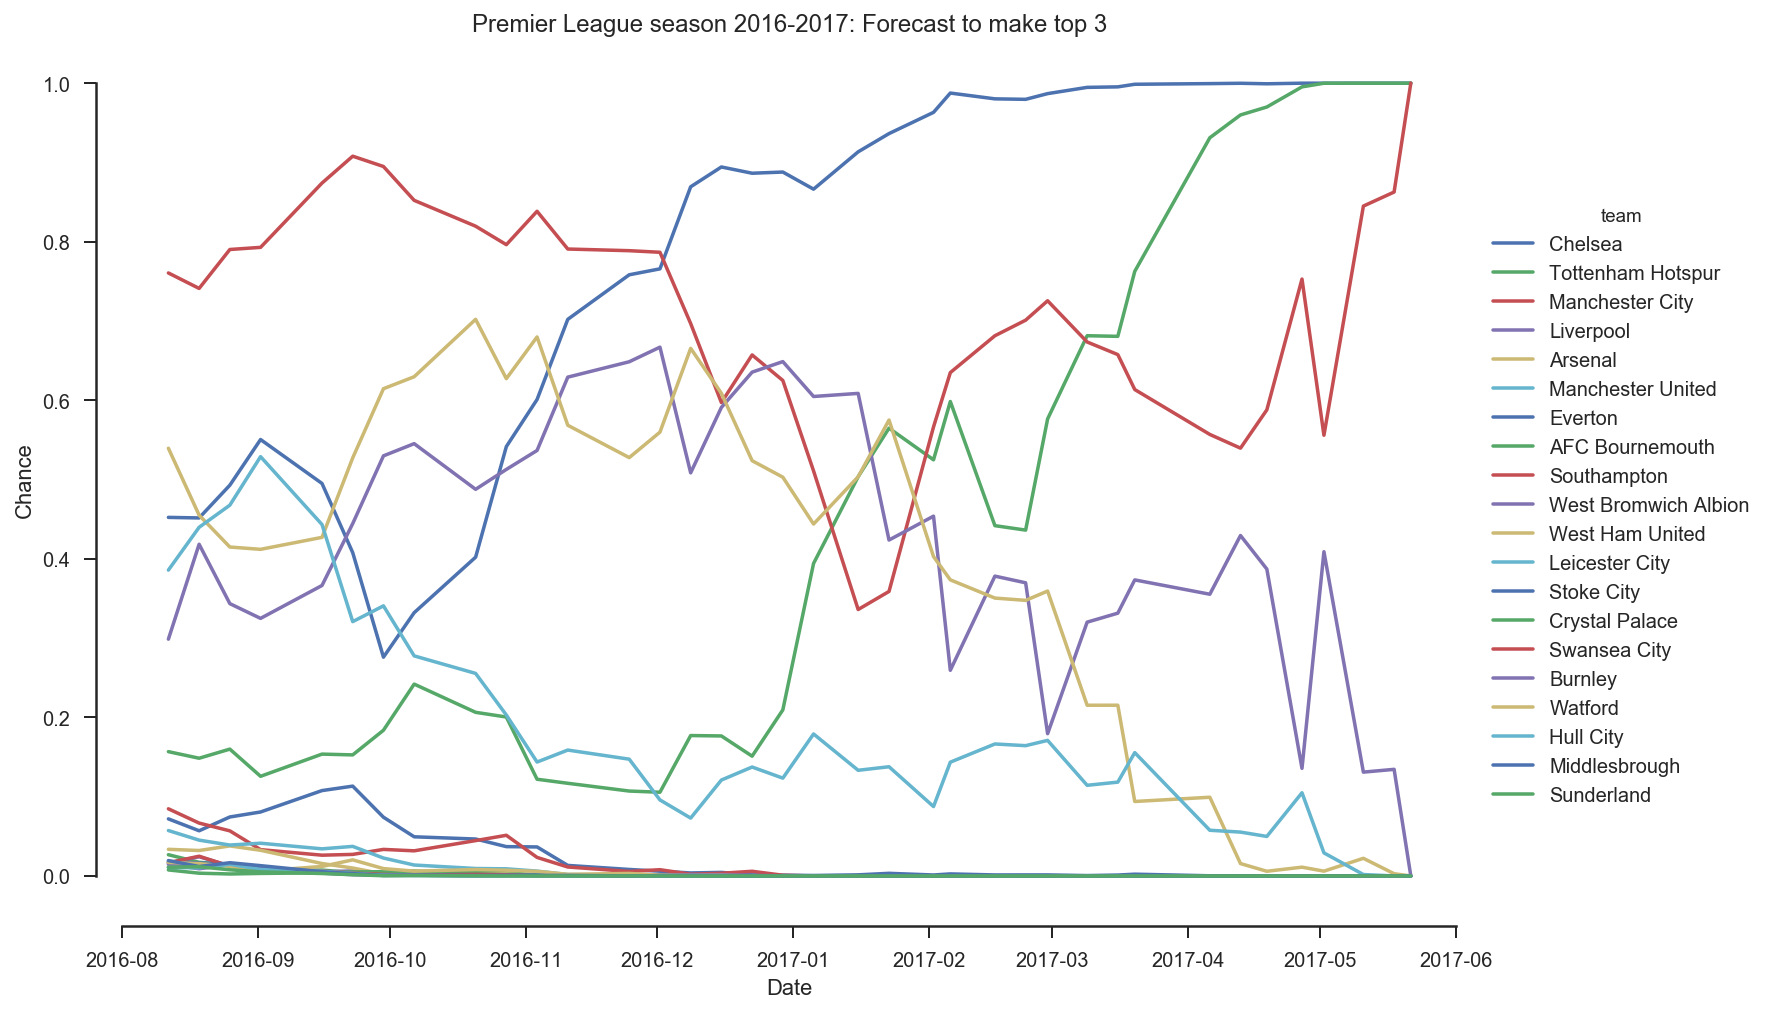

In [7]:
pal = sns.color_palette(n_colors=len(epl_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_top3_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

...while as usual, La Liga showed a very different picture:

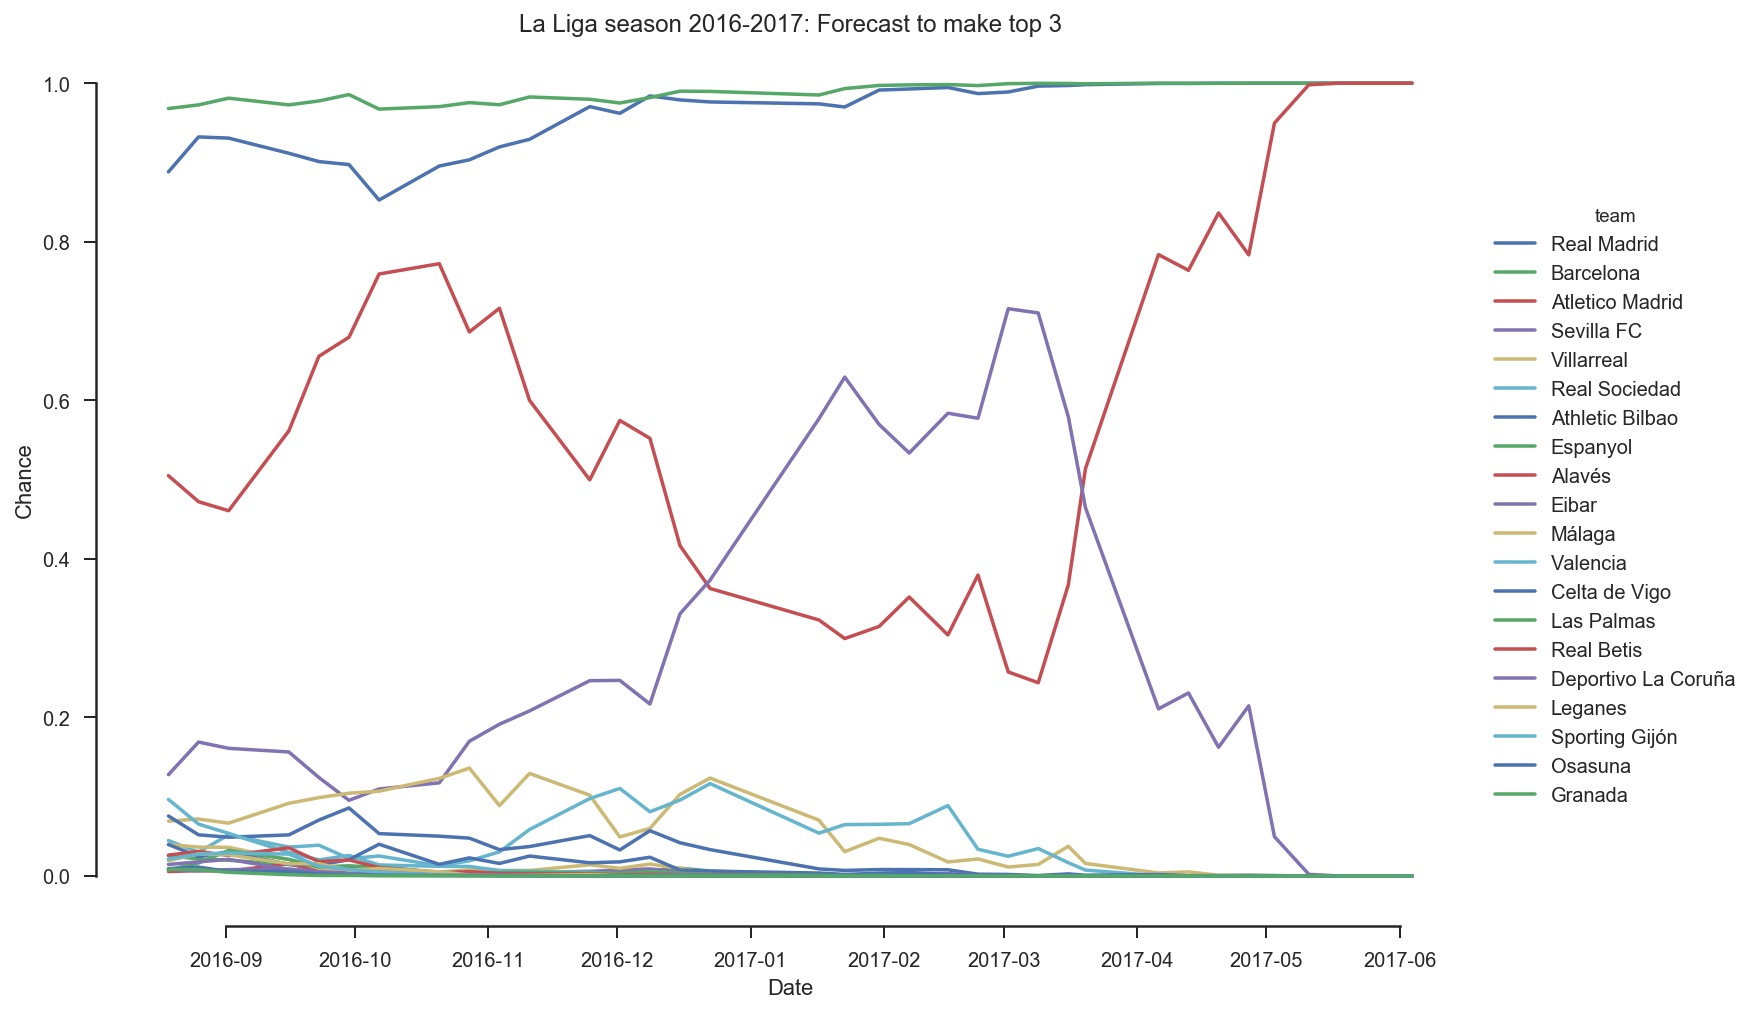

In [8]:
laliga_top3_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_top3_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

When we look at actually winning La Liga, only Real and Barça ever had a chance. This has been the case for many years now in La Liga, so no surprise there.

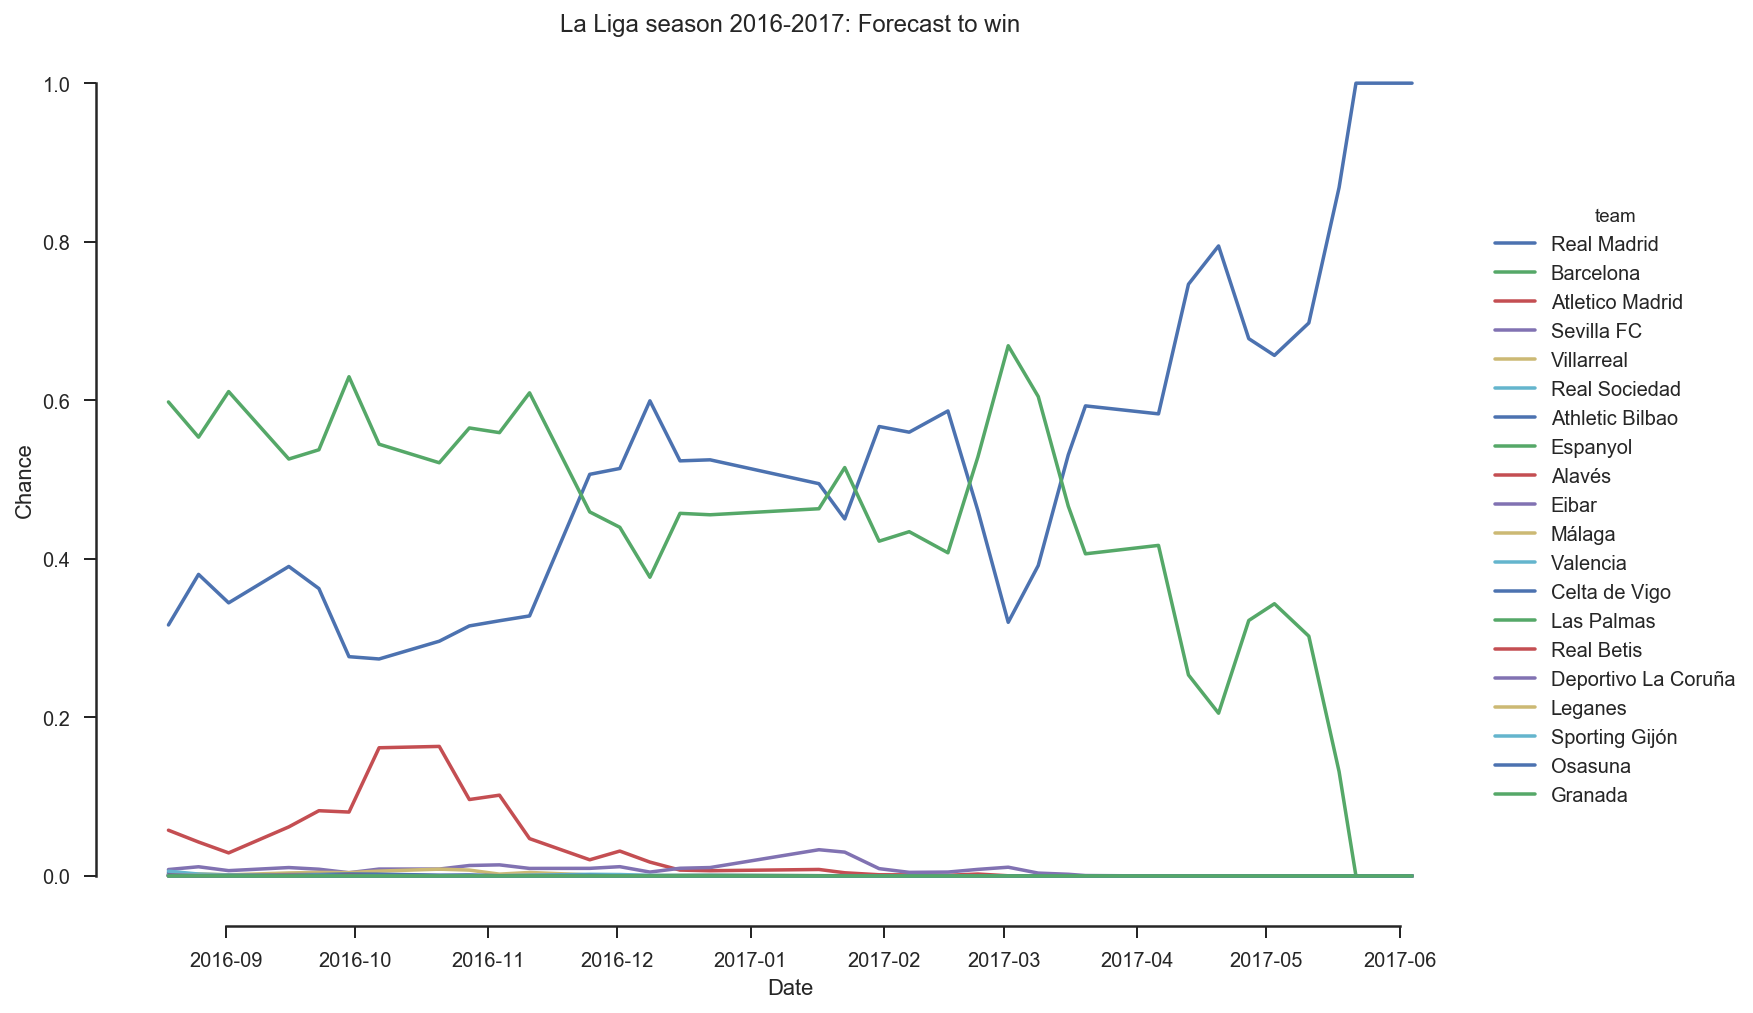

In [9]:
laliga_win_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_win_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

...But the EPL winner for this season was decided as early as December:

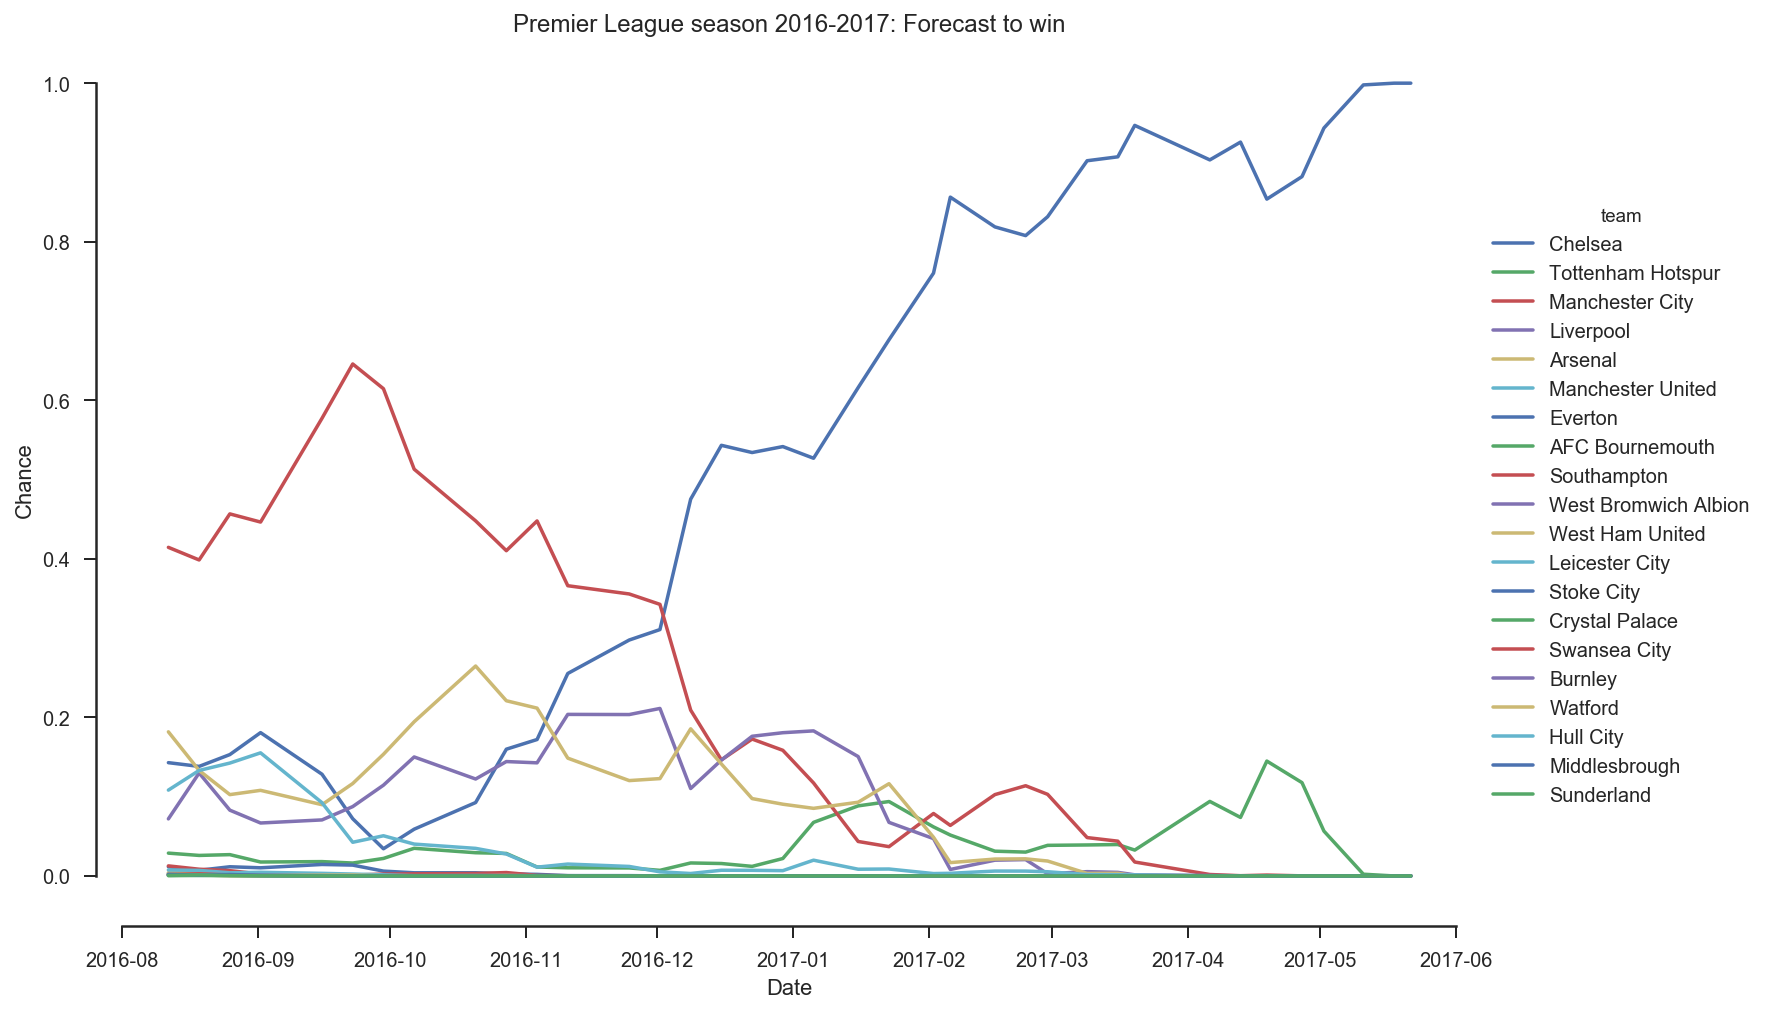

In [10]:
epl_win_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_win_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

# Match history

In [11]:
print(foo.MatchHistory.__doc__)

Provides pandas.DataFrames from CSV files available at
    http://www.football-data.co.uk/data.php

    Column names are explained here: http://www.football-data.co.uk/notes.txt

    Data will be downloaded as necessary and cached locally in ./data

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    seasons : string, int or list of seasons. Examples:
              '16-17'; 2016; '2016-17'; [14, 15, 16]
    


In [12]:
foo.MatchHistory.available_leagues()

['BEL-Jupiler League',
 'ENG-Championship',
 'ENG-Conference',
 'ENG-League 1',
 'ENG-League 2',
 'ENG-Premier League',
 'ESP-La Liga',
 'ESP-La Liga 2',
 'FRA-Ligue 1',
 'FRA-Ligue 2',
 'GER-Bundesliga',
 'GER-Bundesliga 2',
 'GRE-Ethniki Katigoria',
 'ITA-Serie A',
 'ITA-Serie B',
 'NED-Eredivisie',
 'POR-Liga 1',
 'SCO-Division 1',
 'SCO-Division 2',
 'SCO-Division 3',
 'SCO-Premiership',
 'TUR-Ligi 1']

# Home team advantage in the Dutch Eredivisie

We all know sports teams have an advantage when playing at home. Here's a look at home team advantage for 3 years of the Eredivisie, inspired by [this great example](https://tomaugspurger.github.io/modern-5-tidy.html) by Tom Augspurger.

Travel distances in the Netherlands are small, it would be interesting to compare this to competitions where away teams often have to travel further.

In [13]:
eredivisie = foo.MatchHistory('NED-Eredivisie', range(2014, 2017)).read_games()
eredivisie.sample(5)

away_team  B365A  \
league         season game_id                                                
NED-Eredivisie 1415   2014-12-21 FC Twente-Willem II      Willem II    7.0   
               1516   2015-09-19 Willem II-FC Utrecht    FC Utrecht    2.8   
                      2015-09-27 ADO Den Haag-Excelsior   Excelsior    4.5   
               1617   2016-10-16 Excelsior-Roda JC          Roda JC    3.2   
               1415   2015-02-22 Willem II-Ajax                Ajax    2.2   

                                                         B365D  B365H   BWA  \
league         season game_id                                                 
NED-Eredivisie 1415   2014-12-21 FC Twente-Willem II      4.75   1.40  6.75   
               1516   2015-09-19 Willem II-FC Utrecht     3.40   2.40  2.80   
                      2015-09-27 ADO Den Haag-Excelsior   3.75   1.73  4.50   
               1617   2016-10-16 Excelsior-Roda JC        3.40   2.20  3.10   
               1415   2015-02-22 Willem II-Ajax           3.40   3.20  2.05   

                                                          BWD   BWH  Bb1X2  \
league         season game_id                                                
NED-Eredivisie 1415   2014-12-21 FC Twente-Willem II     4.60  1.36     47   
               1516   2015-09-19 Willem II-FC Utrecht    3.25  2.40     41   
                      2015-09-27 ADO Den Haag-Excelsior  3.70  1.70     41   
               1617   2016-10-16 Excelsior-Roda JC       3.25  2.20     48   
               1415   2015-02-22 Willem II-Ajax          3.25  3.25     49   

                                                         BbAH  BbAHh  ...   \
league         season game_id                                         ...    
NED-Eredivisie 1415   2014-12-21 FC Twente-Willem II       24  -1.25  ...    
               1516   2015-09-19 Willem II-FC Utrecht      25  -0.25  ...    
                      2015-09-27 ADO Den Haag-Excelsior    24  -0.50  ...    
               1617   2016-10-16 Excelsior-Roda JC         22  -0.25  ...    
               1415   2015-02-22 Willem II-Ajax            25   0.25  ...    

                                                          PSH  SJA  SJD  SJH  \
league         season game_id                                                  
NED-Eredivisie 1415   2014-12-21 FC Twente-Willem II     1.46  NaN  NaN  NaN   
               1516   2015-09-19 Willem II-FC Utrecht    2.56  NaN  NaN  NaN   
                      2015-09-27 ADO Den Haag-Excelsior  1.75  NaN  NaN  NaN   
               1617   2016-10-16 Excelsior-Roda JC       2.34  NaN  NaN  NaN   
               1415   2015-02-22 Willem II-Ajax          3.41  NaN  NaN  NaN   

                                                          VCA  VCD   VCH  \
league         season game_id                                              
NED-Eredivisie 1415   2014-12-21 FC Twente-Willem II     7.00  4.8  1.45   
               1516   2015-09-19 Willem II-FC Utrecht    2.80  3.5  2.50   
                      2015-09-27 ADO Den Haag-Excelsior  4.50  3.9  1.75   
               1617   2016-10-16 Excelsior-Roda JC       3.13  3.4  2.30   
               1415   2015-02-22 Willem II-Ajax          2.30  3.4  3.20   

                                                          WHA   WHD   WHH  
league         season game_id                                              
NED-Eredivisie 1415   2014-12-21 FC Twente-Willem II     7.00  4.33  1.44  
               1516   2015-09-19 Willem II-FC Utrecht    2.75  3.30  2.38  
                      2015-09-27 ADO Den Haag-Excelsior  4.33  3.50  1.73  
               1617   2016-10-16 Excelsior-Roda JC       3.00  3.30  2.20  
               1415   2015-02-22 Willem II-Ajax          2.20  3.30  3.00  

[5 rows x 54 columns]

In [14]:
def home_away_results(games: pd.DataFrame):
    """Returns aggregated home/away results per team"""
    
    res = (
        pd.melt(games.reset_index(),
                id_vars=['Date', 'FTR'],
                value_name='team', var_name='is_home',
                value_vars=['home_team', 'away_team']))

    res.is_home = res.is_home.replace(['home_team', 'away_team'], ['Home', 'Away'])
    res['win'] = res['lose'] = res['draw'] = 0
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'H'), 'win'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'A'), 'win'] = 1
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'A'), 'lose'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'H'), 'lose'] = 1
    res.loc[res['FTR'] == 'D', 'draw'] = 1

    g = res.groupby(['team', 'is_home'])
    w = (g.win.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_win', 'mean': 'win_pct'}))
    l = (g.lose.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_lose', 'mean': 'lose_pct'}))
    d = (g.draw.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_draw', 'mean': 'draw_pct'}))

    res = pd.concat([w, l, d], axis=1)
    return res

In [15]:
results = home_away_results(eredivisie)
results.head(6)

n_win   win_pct  n_lose  lose_pct  n_draw  draw_pct
team         is_home                                                     
ADO Den Haag Away        11  0.215686      27  0.529412      13  0.254902
             Home        19  0.372549      17  0.333333      15  0.294118
AZ Alkmaar   Away        25  0.490196      17  0.333333       9  0.176471
             Home        24  0.470588      13  0.254902      14  0.274510
Ajax         Away        32  0.627451       6  0.117647      13  0.254902
             Home        39  0.764706       4  0.078431       8  0.156863

The overall picture shows most teams have a clear advantage at home:

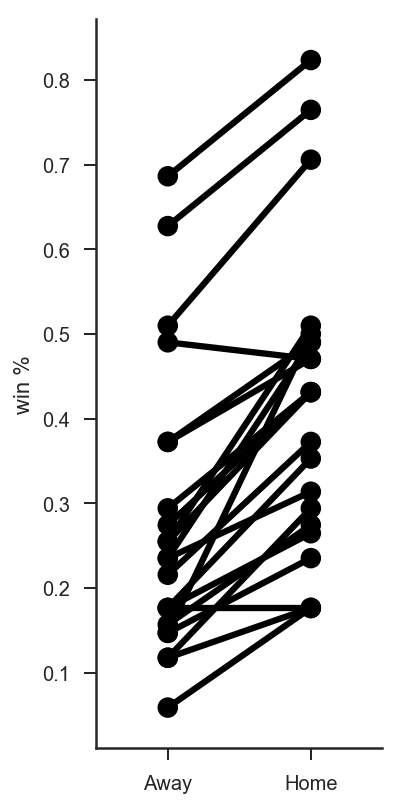

In [16]:
g = sns.FacetGrid(results.reset_index(), hue='team', palette=['k'], size=6, aspect=.5)
g.map(sns.pointplot, 'is_home', 'win_pct', scatter_kws={'alpha':0.3})
g.set_axis_labels('', 'win %');

But there are a few exceptions, namely AZ and NAC Breda. 

Now NAC win only about 17% of their games overall, so not much so say there. But AZ is a top 5 contender who in the past 3 years have won less games at home than away. Meanwhile have a look at NEC Nijmegen's home-away spread: their supporters seem to be doing a much better job.

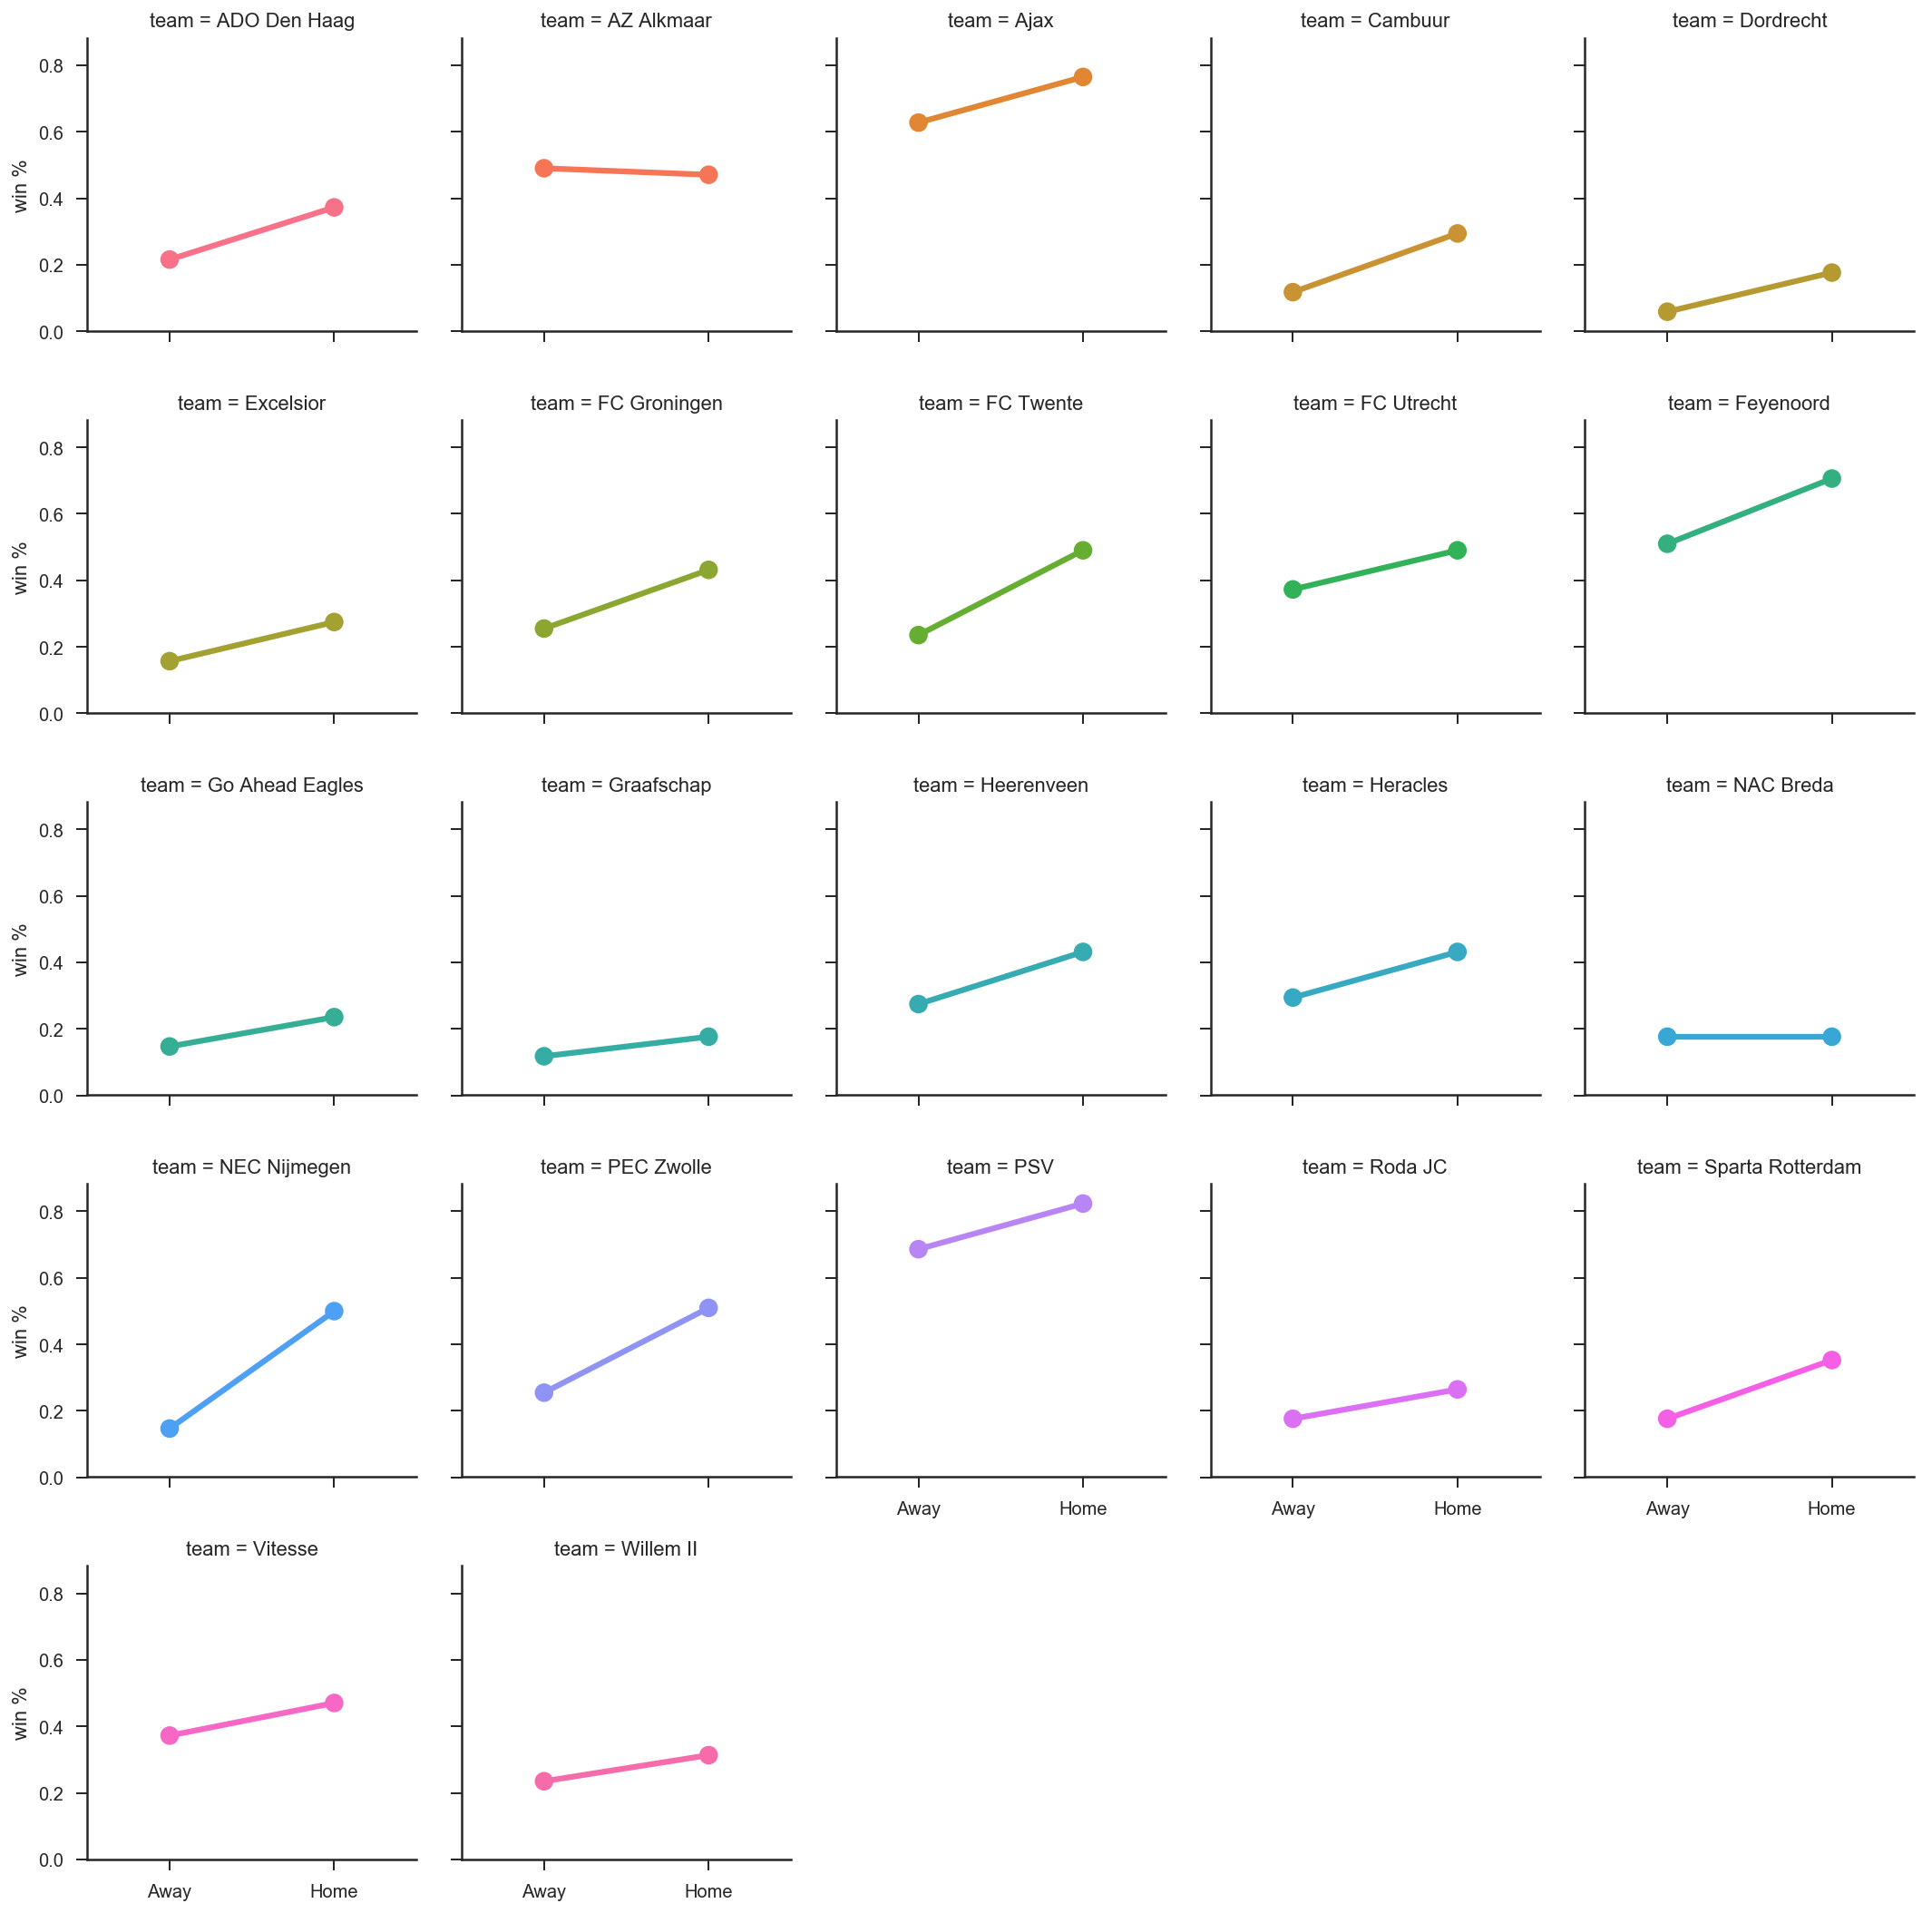

In [17]:
g = sns.FacetGrid(results.reset_index(), 
                  col='team', hue='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win_pct')
g.set_axis_labels('', 'win %');

In [18]:
results.loc['NEC Nijmegen']

,n_win,win_pct,n_lose,lose_pct,n_draw,draw_pct
is_home,,,,,,
Away,5,0.147059,21,0.617647,8,0.235294
Home,17,0.500000,11,0.323529,6,0.176471


# ClubElo

How did the current top 5 teams in the world develop over time?

In [19]:
print(foo.ClubElo.__doc__)

Provides pandas.DataFrames from CSV API at http://api.clubelo.com

    Data will be downloaded as necessary and cached locally in ./data

    Since the source does not provide league names, this class will
    not filter by league. League names will be inserted from the other
    sources where available. Leagues that are only covered by clubelo.com
    will have NaN values.
    


In [30]:
elo = foo.ClubElo()
current_elo = elo.read_by_date()
current_elo.head()

,Rank,Country,Level,Elo,From,To,league
team,,,,,,,
Real Madrid,1,ESP,1,2080.932861,2017-06-04,2017-08-19,ESP-La Liga
Barcelona,2,ESP,1,2019.555054,2017-06-04,2017-08-19,ESP-La Liga
Bayern München,3,GER,1,1996.681274,2017-05-21,2017-08-19,GER-Bundesliga
Atletico Madrid,4,ESP,1,1950.027954,2017-06-04,2017-08-19,ESP-La Liga
Juventus,5,ITA,1,1940.884399,2017-06-04,2017-08-19,ITA-Serie A


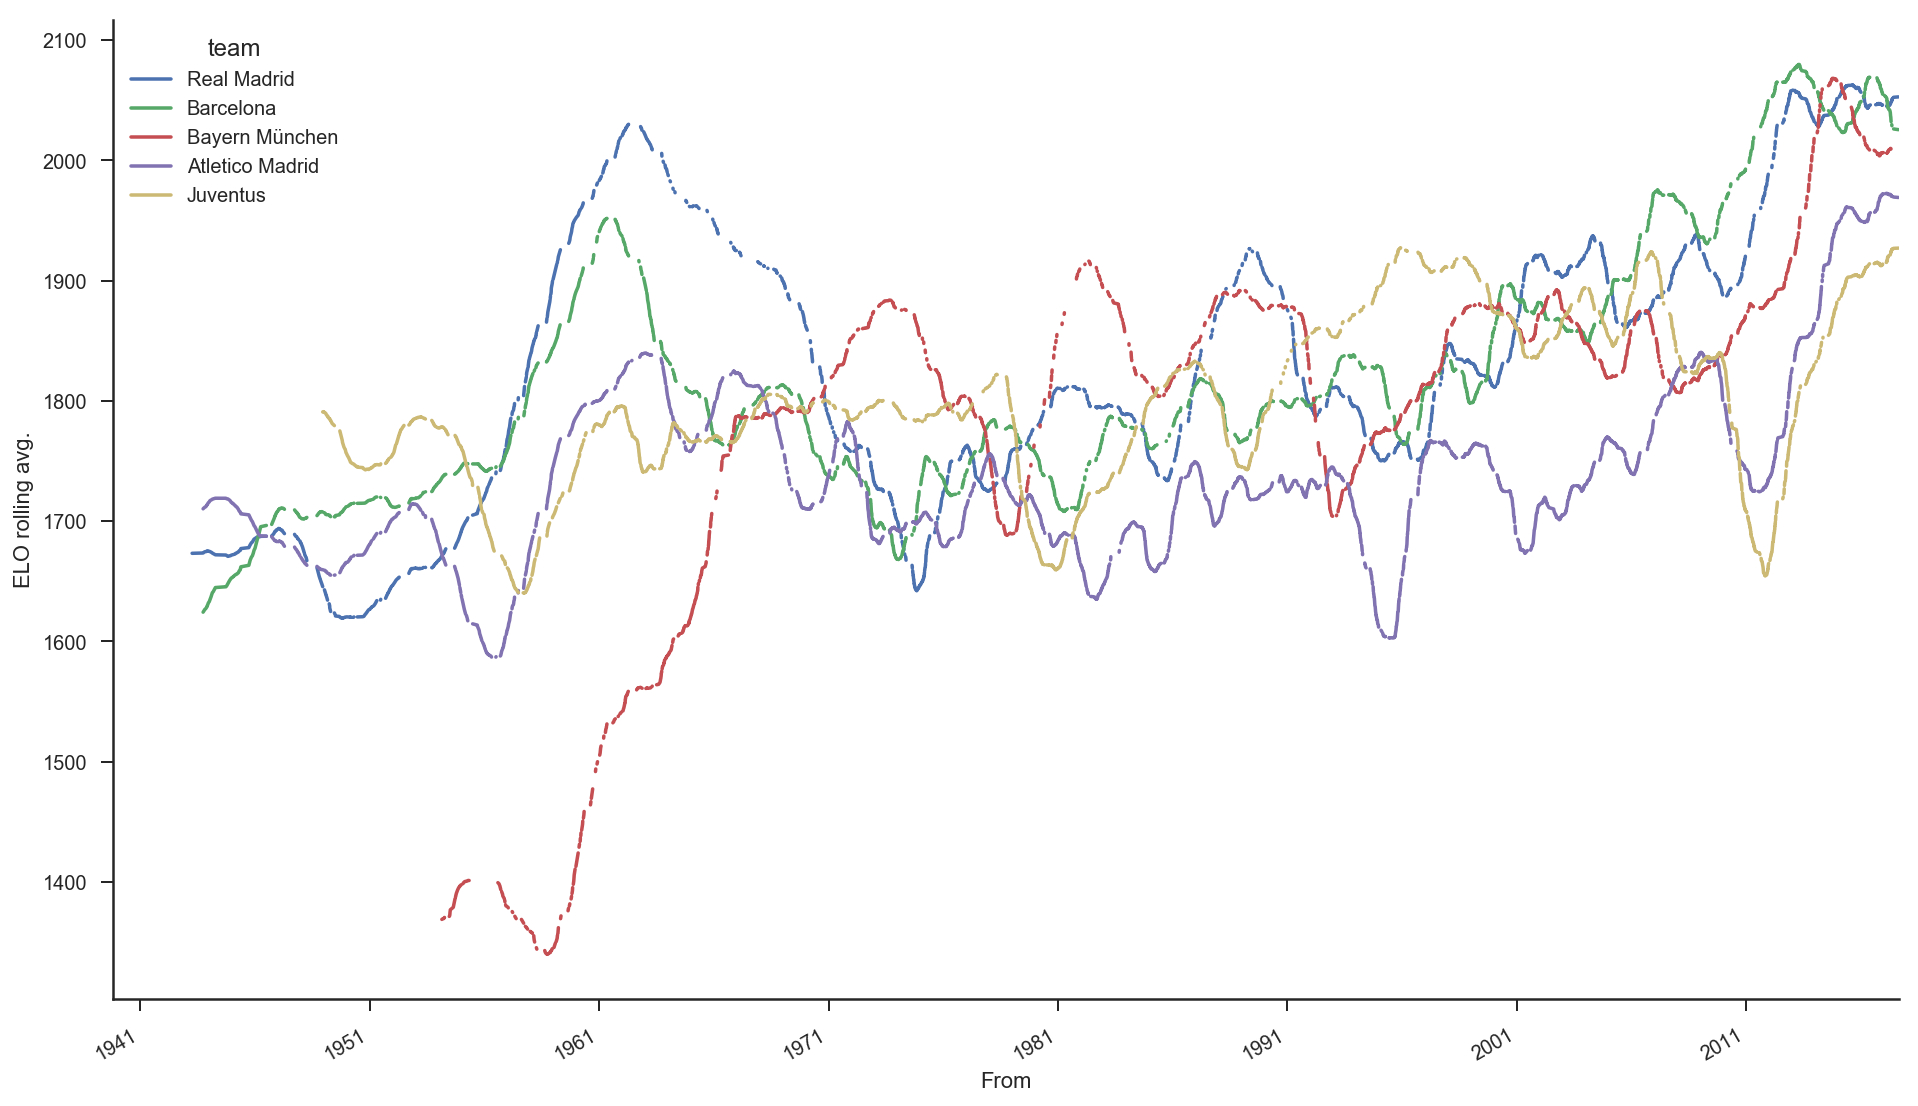

In [31]:
num_teams = 5
smoothing = 100
elo_top_development = pd.concat(
    [elo.read_team_history(team)['Elo'].rolling(smoothing).mean()
     for team in current_elo.reset_index()['team'][:num_teams]
    ],
    axis=1)
elo_top_development.columns = current_elo.reset_index()['team'][:num_teams]
elo_top_development.fillna(method='ffill')

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(111, ylabel='ELO rolling avg.', xlabel='Date')
elo_top_development.plot(ax=ax1)
sns.despine();